In [2]:
# Packages necessary for this notebook
from copy import copy
import numpy             as np
import pandas            as pd
import xarray            as xr
import seaborn           as sns
import cartopy.crs       as crs
import cartopy.feature   as cfeature
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# Import the NOAA data from 1981-2019
NOAA = xr.open_dataset(r'D:\CRI_Modelling_PC\Netcdf Data\NOAA\sst.day.mean.PacCst.1981-2019.nc')

In [4]:
# Put in your temperature ranges here:
# All temperatures in Celcius
min_Temp = 12
max_Temp = 20

In [5]:
# Get lat and lon data
lat = NOAA.lat.data
lon = NOAA.lon.data

In [6]:
NOAA_years = np.where((pd.DatetimeIndex(NOAA.time.data).year>=1982) & (pd.DatetimeIndex(NOAA.time.data).year<=2019))
NOAA_short = NOAA.sst[(NOAA_years[0]),:,:]

In [7]:
# Create a mask for land, count the days, and average them over years
NOAA_Mask  = NOAA.sst.where(NOAA.sst.isnull(), 1)
NOAA_Count = NOAA_short.where((NOAA_short <= max_Temp) & (NOAA_short >= min_Temp)).groupby('time.year').count(dim='time')
count_Mean = NOAA_Count.mean(dim="year")
NOAA_Final = count_Mean*NOAA_Mask[0,:,:]

In [8]:
# Standard deviation data. We might change this, but for now this works
std_Dev = NOAA_Count.std(dim="year")*NOAA_Mask[0,:,:]

In [9]:
# Just for getting state lines 
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

In [10]:
# Creating a figure, change name to species name
'''fig = plt.figure(figsize=[20,10])
fig.suptitle('Halibut Temperature Range '+ str(min_Temp) + '\u00b0C and ' + str(max_Temp) + '\u00b0C',fontsize=32)

# Plot the count_Mean data
NOAA_Plot = fig.add_subplot(1,2,1,projection=crs.LambertConformal())
NOAA_Plot.set_title('Daily averages between ' + str(min_Temp) + '\u00b0C and ' + str(max_Temp) + '\u00b0C, 1982 - 2019', fontsize=20)
NOAA_Plot.set_extent([230,245,20,43], crs.Geodetic())
NOAA_Colormesh = NOAA_Plot.pcolormesh(lon, lat, NOAA_Final.data,
             transform=crs.PlateCarree(),
             cmap='jet',vmax=365)
NOAA_Plot.add_feature(cfeature.COASTLINE)
NOAA_Plot.add_feature(cfeature.LAND)
NOAA_Plot.add_feature(cfeature.BORDERS)
NOAA_Plot.add_feature(states_provinces, edgecolor='gray')
NOAA_Plot.gridlines()

# Create a colorbar
colorbar = fig.colorbar(NOAA_Colormesh, shrink=0.7, anchor=('SW'))
colorbar.set_label('Number of Days',fontsize=24)
colorbar.ax.tick_params(labelsize=22)

# Plot the std_Dev data
std_Plot = fig.add_subplot(1,2,2,projection=crs.LambertConformal())
std_Plot.set_title('Standard Deviation', fontsize=20)
std_Plot.set_extent([230,245,20,43], crs.Geodetic())
std_Colormesh = std_Plot.pcolormesh(lon, lat, std_Dev.data,
             transform=crs.PlateCarree(),
             cmap='jet')
std_Plot.add_feature(cfeature.COASTLINE)
std_Plot.add_feature(cfeature.LAND)
std_Plot.add_feature(cfeature.BORDERS)
std_Plot.add_feature(states_provinces, edgecolor='gray')
std_Plot.gridlines()

# A new colorbar
colorbar2 = fig.colorbar(std_Colormesh, shrink=0.7, anchor=('SW'))
colorbar2.set_label('Number of Days',fontsize=24)
colorbar2.ax.tick_params(labelsize=22)

# Replace "add_name_here" with the name of your species, this will save the graph to the computer so we can have it
# for Gaby's PowerPoint
fig.savefig(r"D:\CRI_Modelling_PC\CRI Maps\HAB 2020\Surface Temperature Spawning" + str(min_Temp) + "-" + str(max_Temp) +".jpeg", bbox_inches='tight')'''

'fig = plt.figure(figsize=[20,10])\nfig.suptitle(\'Halibut Temperature Range \'+ str(min_Temp) + \'°C and \' + str(max_Temp) + \'°C\',fontsize=32)\n\n# Plot the count_Mean data\nNOAA_Plot = fig.add_subplot(1,2,1,projection=crs.LambertConformal())\nNOAA_Plot.set_title(\'Daily averages between \' + str(min_Temp) + \'°C and \' + str(max_Temp) + \'°C, 1982 - 2019\', fontsize=20)\nNOAA_Plot.set_extent([230,245,20,43], crs.Geodetic())\nNOAA_Colormesh = NOAA_Plot.pcolormesh(lon, lat, NOAA_Final.data,\n             transform=crs.PlateCarree(),\n             cmap=\'jet\',vmax=365)\nNOAA_Plot.add_feature(cfeature.COASTLINE)\nNOAA_Plot.add_feature(cfeature.LAND)\nNOAA_Plot.add_feature(cfeature.BORDERS)\nNOAA_Plot.add_feature(states_provinces, edgecolor=\'gray\')\nNOAA_Plot.gridlines()\n\n# Create a colorbar\ncolorbar = fig.colorbar(NOAA_Colormesh, shrink=0.7, anchor=(\'SW\'))\ncolorbar.set_label(\'Number of Days\',fontsize=24)\ncolorbar.ax.tick_params(labelsize=22)\n\n# Plot the std_Dev data\nstd

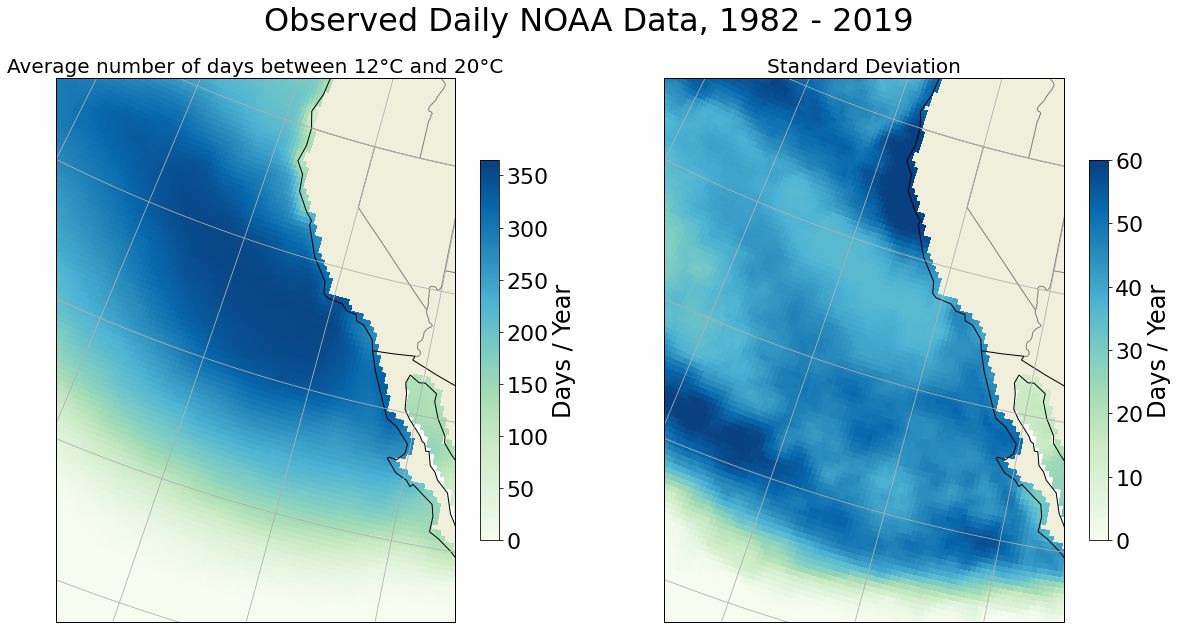

In [11]:
# Creating a figure, change name to species name
fig = plt.figure(figsize=[20,10])
#fig.suptitle('Halibut Temperature Range '+ str(min_Temp) + '\u00b0C and ' + str(max_Temp) + '\u00b0C',fontsize=32)
fig.suptitle('Observed Daily NOAA Data, 1982 - 2019', fontsize=32)

# Plot the count_Mean data
NOAA_Plot = fig.add_subplot(1,2,1,projection=crs.LambertConformal())
NOAA_Plot.set_title('Average number of days between ' + str(min_Temp) + '\u00b0C and ' + str(max_Temp) + '\u00b0C', fontsize=20)
NOAA_Plot.set_extent([230,245,20,43], crs.Geodetic())
NOAA_Colormesh = NOAA_Plot.pcolormesh(lon, lat, NOAA_Final.data,
             transform=crs.PlateCarree(),
             cmap='GnBu',vmax=365)
NOAA_Plot.add_feature(cfeature.COASTLINE)
NOAA_Plot.add_feature(cfeature.LAND)
NOAA_Plot.add_feature(cfeature.BORDERS)
NOAA_Plot.add_feature(states_provinces, edgecolor='gray')
NOAA_Plot.gridlines()

# Create a colorbar
colorbar = fig.colorbar(NOAA_Colormesh, shrink=0.7, anchor=('SW'))
colorbar.set_label('Days / Year',fontsize=24)
colorbar.ax.tick_params(labelsize=22)

# Plot the std_Dev data
std_Plot = fig.add_subplot(1,2,2,projection=crs.LambertConformal())
std_Plot.set_title('Standard Deviation', fontsize=20)
std_Plot.set_extent([230,245,20,43], crs.Geodetic())
std_Colormesh = std_Plot.pcolormesh(lon, lat, std_Dev.data,
             transform=crs.PlateCarree(),
             cmap='GnBu', vmax=60)
std_Plot.add_feature(cfeature.COASTLINE)
std_Plot.add_feature(cfeature.LAND)
std_Plot.add_feature(cfeature.BORDERS)
std_Plot.add_feature(states_provinces, edgecolor='gray')
std_Plot.gridlines()

# A new colorbar
colorbar2 = fig.colorbar(std_Colormesh, shrink=0.7, anchor=('SW'))
colorbar2.set_label('Days / Year',fontsize=24)
colorbar2.ax.tick_params(labelsize=22)

# Replace "add_name_here" with the name of your species, this will save the graph to the computer so we can have it
# for Gaby's PowerPoint
fig.savefig(r"D:\CRI_Modelling_PC\CRI Maps\HAB 2020\Surface Temperature Spawning" + str(min_Temp) + "-" + str(max_Temp) +".jpeg", bbox_inches='tight')

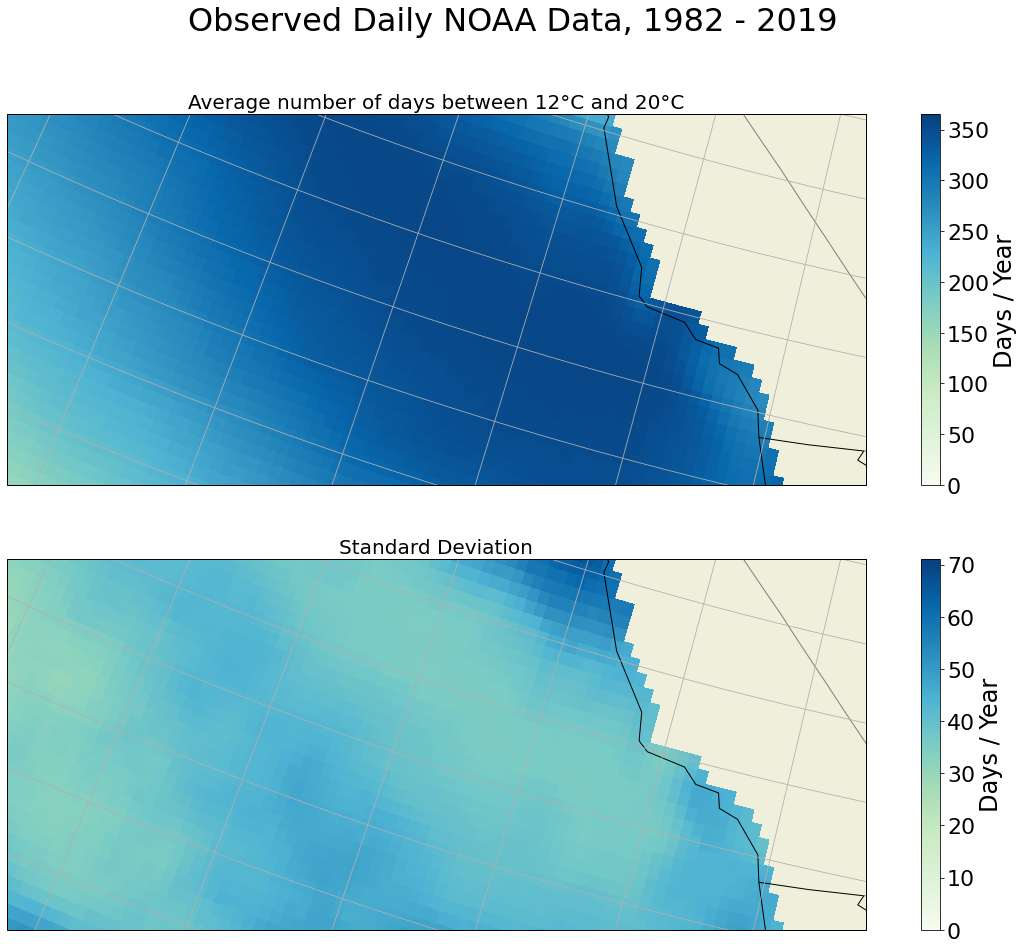

In [58]:
# Creating a figure, change name to species name
fig = plt.figure(figsize=[20,15])
#fig.suptitle('Halibut Temperature Range '+ str(min_Temp) + '\u00b0C and ' + str(max_Temp) + '\u00b0C',fontsize=32)
fig.suptitle('Observed Daily NOAA Data, 1982 - 2019', fontsize=32)

# Plot the count_Mean data
NOAA_Plot = fig.add_subplot(2,1,1,projection=crs.LambertConformal())
NOAA_Plot.set_title('Average number of days between ' + str(min_Temp) + '\u00b0C and ' + str(max_Temp) + '\u00b0C', fontsize=20)
NOAA_Plot.set_extent([225,245,32,34], crs.Geodetic())
NOAA_Colormesh = NOAA_Plot.pcolormesh(lon, lat, NOAA_Final.data,
             transform=crs.PlateCarree(),
             cmap='GnBu',vmax=365)
NOAA_Plot.add_feature(cfeature.COASTLINE)
NOAA_Plot.add_feature(cfeature.LAND)
NOAA_Plot.add_feature(cfeature.BORDERS)
NOAA_Plot.add_feature(states_provinces, edgecolor='gray')
NOAA_Plot.gridlines()

# Create a colorbar
colorbar = fig.colorbar(NOAA_Colormesh, shrink=1, anchor=('SW'))
colorbar.set_label('Days / Year',fontsize=24)
colorbar.ax.tick_params(labelsize=22)

# Plot the std_Dev data
std_Plot = fig.add_subplot(2,1,2,projection=crs.LambertConformal())
std_Plot.set_title('Standard Deviation', fontsize=20)
std_Plot.set_extent([225,245,32,34], crs.Geodetic())
std_Colormesh = std_Plot.pcolormesh(lon, lat, std_Dev.data,
             transform=crs.PlateCarree(),
             cmap='GnBu')
std_Plot.add_feature(cfeature.COASTLINE)
std_Plot.add_feature(cfeature.LAND)
std_Plot.add_feature(cfeature.BORDERS)
std_Plot.add_feature(states_provinces, edgecolor='gray')
std_Plot.gridlines()

# A new colorbar
colorbar2 = fig.colorbar(std_Colormesh, shrink=1, anchor=('SW'))
colorbar2.set_label('Days / Year',fontsize=24)
colorbar2.ax.tick_params(labelsize=22)


fig.savefig(r"D:\CRI_Modelling_PC\CRI Maps\HAB 2020\Surface Temperature Spawning" + str(min_Temp) + "-" + str(max_Temp) +" Zoomed.jpeg", bbox_inches='tight')

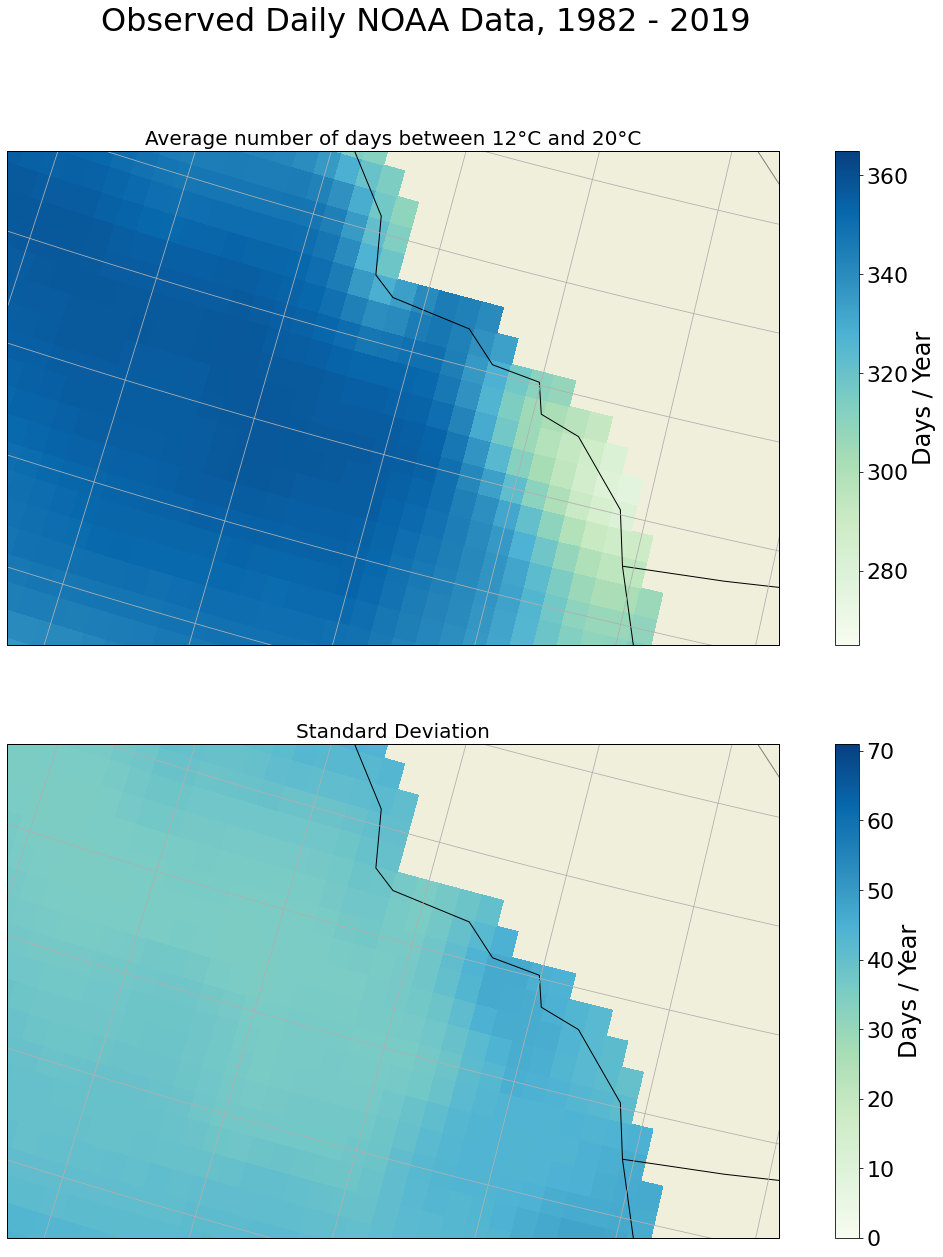

In [64]:
# Creating a figure, change name to species name
fig = plt.figure(figsize=[20,20])
#fig.suptitle('Halibut Temperature Range '+ str(min_Temp) + '\u00b0C and ' + str(max_Temp) + '\u00b0C',fontsize=32)
fig.suptitle('Observed Daily NOAA Data, 1982 - 2019', fontsize=32)

# Plot the count_Mean data
NOAA_Plot = fig.add_subplot(2,1,1,projection=crs.LambertConformal())
NOAA_Plot.set_title('Average number of days between ' + str(min_Temp) + '\u00b0C and ' + str(max_Temp) + '\u00b0C', fontsize=20)
NOAA_Plot.set_extent([236,244,32,35], crs.Geodetic())
NOAA_Colormesh = NOAA_Plot.pcolormesh(lon, lat, NOAA_Final.data,
             transform=crs.PlateCarree(),
             cmap='GnBu',vmax=365, vmin=265)
NOAA_Plot.add_feature(cfeature.COASTLINE)
NOAA_Plot.add_feature(cfeature.LAND)
NOAA_Plot.add_feature(cfeature.BORDERS)
NOAA_Plot.add_feature(states_provinces, edgecolor='gray')
NOAA_Plot.gridlines()

# Create a colorbar
colorbar = fig.colorbar(NOAA_Colormesh, shrink=1, anchor=('SW'))
colorbar.set_label('Days / Year',fontsize=24)
colorbar.ax.tick_params(labelsize=22)

# Plot the std_Dev data
std_Plot = fig.add_subplot(2,1,2,projection=crs.LambertConformal())
std_Plot.set_title('Standard Deviation', fontsize=20)
std_Plot.set_extent([236,244,32,35], crs.Geodetic())
std_Colormesh = std_Plot.pcolormesh(lon, lat, std_Dev.data,
             transform=crs.PlateCarree(),
             cmap='GnBu')
std_Plot.add_feature(cfeature.COASTLINE)
std_Plot.add_feature(cfeature.LAND)
std_Plot.add_feature(cfeature.BORDERS)
std_Plot.add_feature(states_provinces, edgecolor='gray')
std_Plot.gridlines()

# A new colorbar
colorbar2 = fig.colorbar(std_Colormesh, shrink=1, anchor=('SW'))
colorbar2.set_label('Days / Year',fontsize=24)
colorbar2.ax.tick_params(labelsize=22)


fig.savefig(r"D:\CRI_Modelling_PC\CRI Maps\HAB 2020\Surface Temperature Spawning" + str(min_Temp) + "-" + str(max_Temp) +" Zoom Option 2.jpeg", bbox_inches='tight')